In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
movies_data_df = pd.read_csv('Data_Sources/good_movies.csv')
movies_data_df.head()

C:\Users\amudd\AppData\Local\Temp\ipykernel_3544\3283336974.py:1: DtypeWarning: Columns (0,1,4,9,13,14,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
movies_data_df = movies_data_df.iloc[:, :24]
movies_data_df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4805,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4806,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4807,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98,"[{""iso_639_1"": ""en"", ""name"": ""Eng

In [4]:
movies_data_df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [5]:
movies_data_df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  845
title                      1
vote_average               1
vote_count                 1
cast                      44
crew                       1
director                  37
dtype: int64

In [6]:
movies_data_df['budget'] = pd.to_numeric(movies_data_df['budget'], errors='coerce')
movies_data_df['revenue'] = pd.to_numeric(movies_data_df['revenue'], errors='coerce')

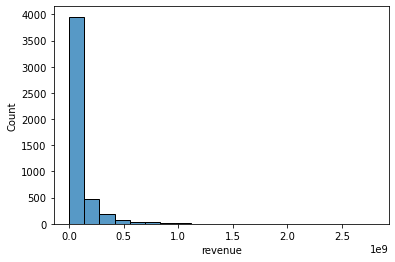

In [7]:
# visualize the distribution of the revenue variable
sns.histplot(data=movies_data_df, x='revenue', bins=20)
plt.show()

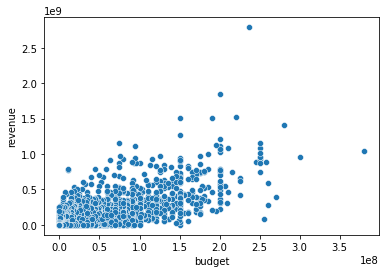

In [8]:
# create a scatter plot of budget vs. revenue
sns.scatterplot(data=movies_data_df, x='budget', y='revenue')
plt.show()

In [9]:
movies_data_df.isna().sum()

index                      0
budget                     6
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    6
runtime                    2
spoken_languages           0
status                     0
tagline                  845
title                      1
vote_average               1
vote_count                 1
cast                      44
crew                       1
director                  37
dtype: int64

In [10]:
movies_data_df['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4804    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4805                                                   []
4806    [{"iso_3166_1": "US", "name": "United States o...
4807    [{"iso_3166_1": "US", "name": "United States o...
4808    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4809, dtype: object

In [11]:
# Define a function to extract the country name from the production_countries column
def extract_country_name(row):
    try:
        countries = json.loads(row)
        if len(countries) > 0:
            country_name = countries[0]['name']
            return country_name
    except:
        pass
    return None

# Apply the function to the production_countries column
movies_data_df['production_countries'] = movies_data_df['production_countries'].apply(extract_country_name)
movies_data_df['production_countries']

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
                  ...           
4804                      Mexico
4805                        None
4806    United States of America
4807    United States of America
4808    United States of America
Name: production_countries, Length: 4809, dtype: object

In [12]:
movies_data_df.isna().sum()

index                      0
budget                     6
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries     180
release_date               1
revenue                    6
runtime                    2
spoken_languages           0
status                     0
tagline                  845
title                      1
vote_average               1
vote_count                 1
cast                      44
crew                       1
director                  37
dtype: int64

In [14]:
movies_data_df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [19]:
movies_data_df.columns

Index(['index', 'budget', 'genres', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'status', 'tagline',
       'title', 'vote_average', 'vote_count', 'cast', 'director'],
      dtype='object')

In [20]:
movies_data_df = movies_data_df.drop(['status'], axis=1)

# fill NaN values with commas for text-based columns
text_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'overview', 'tagline', 'cast','director']
movies_data_df[text_columns] = movies_data_df[text_columns].fillna(',')

In [21]:
movies_data_df.columns

Index(['index', 'budget', 'genres', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'director'],
      dtype='object')

In [22]:
movies_data_df.isna().sum()

index                   0
budget                  6
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 6
runtime                 2
tagline                 0
title                   1
vote_average            1
vote_count              1
cast                    0
director                0
dtype: int64

In [23]:
movies_data_df = movies_data_df.dropna(subset=['budget', 'runtime', 'title', 'vote_average', 'vote_count', 'revenue'])
movies_data_df.isna().sum()

index                   0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
director                0
dtype: int64

In [24]:
avatar_cast = movies_data_df.loc[movies_data_df['title'] == 'Avatar', 'cast'].values[0]
print(avatar_cast)

Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez


In [25]:
cast_string = 'Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez'
cast_list = cast_string.split()
new_cast_list = []

for i, name in enumerate(cast_list):
    if i % 2 == 0:
        new_cast_list.append(name)
    else:
        new_cast_list[-1] += ' ' + name

result = ', '.join(new_cast_list)
print(result)

Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez


In [26]:
movies_data_df['cast'] = movies_data_df['cast'].apply(lambda x: ', '.join([f"{a} {b}" for a, b in zip(x.split()[::2], x.split()[1::2])]))
movies_data_df['cast']

0       Sam Worthington, Zoe Saldana, Sigourney Weaver...
1       Johnny Depp, Orlando Bloom, Keira Knightley, S...
2       Daniel Craig, Christoph Waltz, L\u00e9a Seydou...
3       Christian Bale, Michael Caine, Gary Oldman, An...
4       Taylor Kitsch, Lynn Collins, Samantha Morton, ...
                              ...                        
4804    Carlos Gallardo, Jaime de, Hoyos Peter, Marqua...
4805    Edward Burns, Kerry Bish\u00e9, Marsha Dietlei...
4806    Eric Mabius, Kristin Booth, Crystal Lowe, Geof...
4807    Daniel Henney, Eliza Coupe, Bill Paxton, Alan ...
4808    Drew Barrymore, Brian Herzlinger, Corey Feldma...
Name: cast, Length: 4801, dtype: object

In [27]:
movies_data_df['production_companies']

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4804             [{"name": "Columbia Pictures", "id": 5}]
4805                                                   []
4806    [{"name": "Front Street Pictures", "id": 3958}...
4807                                                   []
4808    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4801, dtype: object

In [28]:
#extracting production company from column
production_company = '[{"name": "Walt Disney Pictures", "id": 2}]'
parsed_production_company = json.loads(production_company)
company_name = parsed_production_company[0]['name']
print(company_name)

Walt Disney Pictures


In [29]:


# Define a function to extract company names
def extract_company_names(x):
    try:
        companies = json.loads(x)
        return [company['name'] for company in companies]
    except (json.JSONDecodeError, TypeError):
        return []

# Apply the function to the production_companies column
movies_data_df['production_companies'] = movies_data_df['production_companies'].apply(extract_company_names)
movies_data_df['production_companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4804                                  [Columbia Pictures]
4805                                                   []
4806    [Front Street Pictures, Muse Entertainment Ent...
4807                                                   []
4808         [rusty bear entertainment, lucky crow films]
Name: production_companies, Length: 4801, dtype: object

In [30]:
movies_data_df.head(3)

,index,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,director
0,0,237000000.0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",United States of America,2.787965e+09,162,Enter the World of Pandora.,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron
1,1,300000000.0,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",United States of America,9.610000e+08,169,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski
2,2,245000000.0,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",United Kingdom,8.806746e+08,148,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig, Christoph Waltz, L\u00e9a Seydou...",Sam Mendes


In [31]:
movies_data_df['genres'] = movies_data_df['genres'].str.replace(' ', ',')
movies_data_df.head(3)

,index,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,director
0,0,237000000.0,"Action,Adventure,Fantasy,Science,Fiction",culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",United States of America,2.787965e+09,162,Enter the World of Pandora.,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron
1,1,300000000.0,"Adventure,Fantasy,Action",ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",United States of America,9.610000e+08,169,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski
2,2,245000000.0,"Action,Adventure,Crime",spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",United Kingdom,8.806746e+08,148,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig, Christoph Waltz, L\u00e9a Seydou...",Sam Mendes


In [33]:
movies_data_df.drop('index', axis=1, inplace=True)

In [39]:
movies_data_df['budget'] = movies_data_df['budget'].astype(int)
movies_data_df['revenue'] = movies_data_df['revenue'].astype(int)
movies_data_df['runtime'] = movies_data_df['runtime'].astype(int)
movies_data_df['popularity'] = movies_data_df['popularity'].astype(float)
movies_data_df['vote_average'] = movies_data_df['vote_average'].astype(float)
movies_data_df['vote_count'] = movies_data_df['vote_count'].astype(int)

In [45]:
for col in movies_data_df.select_dtypes(include=['object']):
    movies_data_df[col] = movies_data_df[col].astype(str)

In [46]:
movies_data_df.dtypes

budget                    int32
genres                   object
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
revenue                   int32
runtime                   int32
tagline                  object
title                    object
vote_average            float64
vote_count                int32
cast                     object
director                 object
dtype: object

In [51]:
movies_data_df['revenue']

0      -2147483648
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4804       2040920
4805             0
4806             0
4807             0
4808             0
Name: revenue, Length: 4801, dtype: int32

In [55]:
new = movies_data_df['revenue'][0]
new = abs(new)
print(new)

-2147483648


In [34]:
movies_data_df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'director'],
      dtype='object')

In [50]:
movies_data_df.to_csv('Data_Sources/movies_data.csv', index=False)

### Predicting vote average of movies (Random Forest Regressor) ###

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features
relevant_cols = ['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'director']

df = movies_data_df[relevant_cols]

# Handle categorical columns with one-hot encoding
cat_cols = ['genres', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies','production_countries', 'tagline', 'title','cast', 'director']
for col in cat_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df = df.drop(col, axis=1)
df

,budget,popularity,revenue,runtime,vote_average,vote_count,"genres_,",genres_Action,"genres_Action,Adventure","genres_Action,Adventure,Animation,Comedy,Family",...,director_Zackary Adler,director_Zak Penn,director_Zal Batmanglij,director_Zhang Yimou,director_Zoran Lisinac,director_\u00c0lex Pastor,director_\u00c1lex de la Iglesia,director_\u00c9mile Gaudreault,director_\u00c9ric Tessier,director_\u00c9tienne Faure
0,237000000,150.437577,-2147483648,162,7.2,11800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139.082615,961000000,169,6.9,4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,880674609,148,6.3,4466,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,1084939099,165,7.6,9106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,43.926995,284139100,132,6.1,2124,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,14.269792,2040920,81,6.6,238,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4805,9000,0.642552,0,85,5.9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4806,0,1.444476,0,120,7.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4807,0,0.857008,0,98,5.7,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Split the data into training and testing sets
X = df.drop('vote_average', axis=1)
y = df['vote_average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor - Mean squared error: ", mse)
print("Random Forest Regressor - R-squared: ", r2)

Random Forest Regressor - Mean squared error:  0.5881131155046826
Random Forest Regressor - R-squared:  0.5821323549789466


The results show that the model has a mean squared error of 0.59 and an R-squared value of 0.58, indicating that the model's predictions are reasonably accurate, but there is still room for improvement.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gbr.fit(X_train, y_train)

# make predictions on the test data
y_pred = gbr.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor - Mean squared error: ", mse)
print("Gradient Boosting Regressor - R-squared: ", r2)

Gradient Boosting Regressor - Mean squared error:  0.5658245065575822
Gradient Boosting Regressor - R-squared:  0.5979689147936815


The results show that the model has a mean squared error of 0.57 and an R-squared value of 0.6, indicating that the model's predictions are reasonably accurate, but there is still room for improvement.

In [ ]:
from sklearn.linear_model import LinearRegression

# Split the data into features and target
X = df.drop('vote_average', axis=1)
y = df['vote_average']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr_model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression - Mean squared error: ", mse)
print("Linear Regression - R-squared: ", r2)

In [ ]:
from sklearn.svm import SVR

# Split the data into features and target
X = df.drop('vote_average', axis=1)
y = df['vote_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("SVR - Mean squared error: ", mse)
print("SVR - R-squared: ", r2)

In [ ]:
from joblib import dump

# save the gbr trained model to an h5 file
dump(gbr, 'gbr_model.h5')

In [ ]:
# Save the rf model to an h5 file using joblib
dump(rf, 'random_forest_regressor.h5')

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.05, 0.01]
# }

# # create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=GradientBoostingRegressor(),
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error'
# )

# # fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # get the best estimator and make predictions on the test data
# best_gbr = grid_search.best_estimator_
# y_pred = best_gbr.predict(X_test)

# # evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Gradient Boosting Regressor - Mean squared error: ", mse)
# print("Gradient Boosting Regressor - R-squared: ", r2)
# print("Best parameters: ", grid_search.best_params_)
#^ ran in google collab

Best parameters for gbr model:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

### Dimension reduction with PCA on rfr ###

In [ ]:
from sklearn.decomposition import PCA

# Split the data into training and testing sets
X = df.drop('vote_average', axis=1)
y = df['vote_average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Random Forest Regressor model with the transformed data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor (with PCA) - Mean squared error: ", mse)
print("Random Forest Regressor (with PCA) - R-squared: ", r2)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV


# # Split the data into training and testing sets
# X = df.drop('vote_average', axis=1)
# y = df['vote_average']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {'n_estimators': [100, 200, 300, 400, 500],
#                        'max_features': ['auto', 'sqrt', 'log2', None],
#                        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#                        'min_samples_split': [2, 5, 10],
#                        'min_samples_leaf': [1, 2, 4],
#                        'bootstrap': [True, False]}

# # Define the model to use
# rf = RandomForestRegressor(random_state=42)

# # Define the RandomizedSearchCV object
# random_search = RandomizedSearchCV(rf, param_distributions=param_distributions, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters found
# print("Best parameters: ", random_search.best_params_)

# # Make predictions on the test data using the best model found
# y_pred = random_search.best_estimator_.predict(X_test)

# # Evaluate the model using mean squared error and R-squared
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Random Forest Regressor - Mean squared error: ", mse)
# print("Random Forest Regressor - R-squared: ", r2)